**Problem Statement:**

The largest online loan marketplace, specializing in personal loans, business loans, and medical procedure financing, offers borrowers the convenience of accessing lower interest rate loans through a streamlined online interface.

The primary concern lies in the identification and handling of 'risky' applicants, as extending loans to individuals with a higher likelihood of default poses a substantial threat to the company's financial stability. The term 'charged-off' is attributed to customers who, unfortunately, fall into the category of defaulters, causing a substantial financial loss to the lending institution.



**Objective:**

Ultimately, our objective is to enhance the precision of risk assessment and decision-making processes, enabling us to proactively address potential defaults. By leveraging the findings from EDA, we aim to implement effective measures that not only reduce credit loss but also foster a more resilient and sustainable lending environment for our online loan marketplace.

**Dataset:**

It contains the complete loan data for all loans issued through the time period 2007 t0 2011.

Importing Necessary Libaries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

Loading Data

In [ ]:
data = pd.read_csv('/content/loan.csv')
data_dict = pd.read_excel('/content/Data_Dictionary.xlsx')

Data Understanding

In [ ]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
data_dict.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [ ]:
data.shape

(39717, 111)

In [ ]:
print('Number of Rows:')
data.shape[0]

Number of Rows:


39717

In [ ]:
print('Number of Columns:')
data.shape[1]

Number of Columns:


111

In [ ]:
print('Information about dataframe: ')
data.info()

Information about dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [ ]:
print('List all columns present in dataframe: ')
data.columns

List all columns present in dataframe: 


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [ ]:
print('Datatype of each column present in dataset: ')
data.dtypes

Datatype of each column present in dataset: 


id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [ ]:
print('Describing the dataframe: ')
data.describe

Describing the dataframe: 


<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ... 

In [ ]:
#finding missing values columns in dataframe
print(data.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [ ]:
#calculating percentage of null values in columns so that we can find a basis to remove them
print((data.isnull().sum()/data.shape[0]*100).round(2).sort_values(ascending=False))

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64


In [ ]:
#we can remove columns having more than 50% percent of null values as it will help in good analysis
data = data.loc[:,data.isnull().sum()/data.shape[0]*100<50]

In [ ]:
#Now checking again the null percentage value in dataset
print((data.isnull().sum()/data.shape[0]*100).round(2).sort_values(ascending=False))

desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_acc                      0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
collection_recovery_fee        0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
pub_rec                        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq                 0.00
delinq_amnt                 

In [ ]:
data.shape

(39717, 54)

In [ ]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

Now, only 54 columns are left out of 111 columns in dataframe.
We can also remove some irrelavent columns as they will provide no information helping in achieving our goal i.e. person will default on loan or not.

In [ ]:
data=data.drop(['member_id','title','emp_title','desc','url','zip_code'],axis=1)
data=data.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)

In [ ]:
#Removing column "funded_amnt_inv" as it is a internal data and is calculated after loan approval
data=data.drop(['funded_amnt_inv'],axis=1)

In [ ]:
data.shape

(39717, 26)

In [ ]:
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

It can be observed that some columns are having only one or some unique values. So, those columns can also be removed for analysis purpose.

In [ ]:
#finding number of unique values in each column
print(data.nunique().sort_values(ascending=True))

tax_liens                         1
pymnt_plan                        1
collections_12_mths_ex_med        1
policy_code                       1
initial_list_status               1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
id                            39717
dtype: int64


So, columns with one unique value in dataset can be removed

In [ ]:
data = data.loc[:,data.nunique()>1]

In [ ]:
data.shape

(39717, 18)

In [ ]:
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

Checking for null and missing values

In [ ]:
print(data.isnull().sum().sort_values(ascending=False))

emp_length              1075
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64


This two columns contains null values

emp_length              1075

pub_rec_bankruptcies     697

Now this can either be removed or fixed, this can be decided based on their dependency on finding whether they will help in finding the person will default on loan or not.

In [ ]:
print(data.emp_length.value_counts())

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


In [ ]:
print(data.pub_rec_bankruptcies.value_counts())

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


For column emp_length we can see that frequency is more than the frequency of next . So, we can remove null value as fixing is not feasible

For pub_rec_bankruptcies column ,max. values are 0 , so null values can be filled with 0 only.

In [ ]:
# Removing null values in emp_title and emp_length columns
data = data.dropna(subset=['emp_length'])

In [ ]:
#inserting 0 in place of null values in pub_rec_bankruptcies
data.pub_rec_bankruptcies.fillna(0,inplace=True)

In [ ]:
data.shape

(38642, 18)

In [ ]:
#verifying all null values are treated
print(data.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64


In [ ]:
#Removing duplicate values from dataframe ,if they exists
data = data.drop_duplicates()

In [ ]:
data.shape

(38642, 18)

Correcting column datatype

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state         

In [ ]:
#correcting datatypes as required for analysis
data.term=data.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
data.int_rate=data.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
data.grade=data.grade.astype('category')
data.sub_grade=data.sub_grade.astype('category')
data.emp_length=data.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)
data.home_ownership=data.home_ownership.astype('category')
data.verification_status=data.verification_status.astype('category')
data.issue_d=pd.to_datetime(data.issue_d,format='%b-%y')
data['issue_year']=pd.to_datetime(data.issue_d,format='%b-%y').dt.year
data['issue_month']=pd.to_datetime(data.issue_d,format='%b-%y').dt.month
data.purpose=data.purpose.astype('category')
data.addr_state=data.addr_state.astype('category')

In [ ]:
for x in data.columns:
  if(data[x].dtype=='float64'):
    data[x]=data[x].round(2)

In [ ]:
data.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,5000,5000,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,2011,12
1,1077430,2500,2500,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,2011,12
2,1077175,2400,2400,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,2011,12
3,1076863,10000,10000,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,2011,12
4,1075358,3000,3000,60,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0.0,2011,12


As we can only perform analysis on the Completed loan or Defaulted loans data for our goal so removing data having loan_status as "Current"

In [ ]:
data = data[data.loan_status!='Current']

In [ ]:
data.shape

(37544, 20)

In [ ]:
#selecting some useful and specific columns that will be helpful during analysis
data = data[['id','loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies','issue_year','issue_month']]
data.shape

(37544, 17)

Dividing columns based on categorical and numerical features

In [ ]:
categorical_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
numerical_cols=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_cols=['loan_status']

Checking for outliers in numerical columns

In [ ]:
px.box(data,x='loan_amnt',width=600,height=300,title='Box plot for Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()

In [ ]:
px.box(data,x='int_rate',width=600,height=300,title='Box Plot for Distribution of Interest Rate',labels={'int_rate':'Interest Rate'}).show()

In [ ]:
px.box(data,x='annual_inc',width=600,height=300,title='Box Plot for Distribution of Annual Income of the Burrower',labels={'annual_inc':'Annual Income'}).show()

In [ ]:
#line chart to find the appropriate quantile to use to remove outliers
px.line(sorted(data.annual_inc),width=600,height=300,title='Trend of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()

In [ ]:
#Removing outliers in annual_inc greater than 99th percentile
data = data[data.annual_inc<=np.percentile(data.annual_inc,99)]

In [ ]:
px.line(sorted(data.annual_inc),width=600,height=300,title='Trend of Annual Income',labels={'value':'Annual Income','index':'Position in Data'}).show()

This trend is looking more compatible as compared to that was before removing outliers in annual income.

In [ ]:
px.box(data,x='dti',width=600,height=300,title='Distribution of Debt To Income Ratio',labels={'dti':'DTI ratio'}).show()

In all numerical columns other than Annual income no outliers were seen.

Now our data is cleaned and all outliers has been removed . Now, univariate and bivariate analysis can be done on this data.

Univariate Analysis

Text(0, 0.5, 'Count')

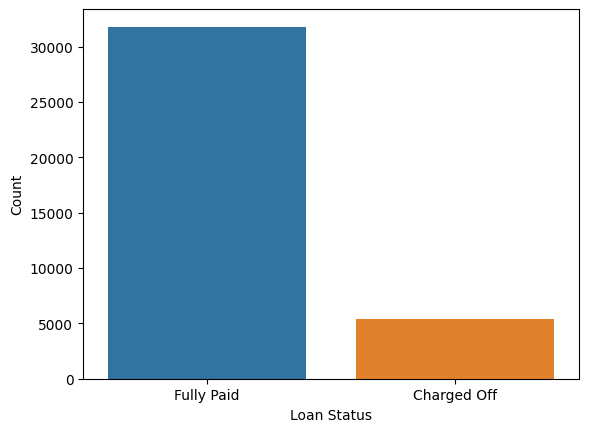

In [ ]:
#Loan Status
plot1=sns.countplot(x ='loan_status', data = data)
plot1.set_xlabel('Loan Status')
plot1.set_ylabel('Count')

Inference: Loan defaulters are less as compared to people who have fully paid the loan

Text(0, 0.5, 'Count')

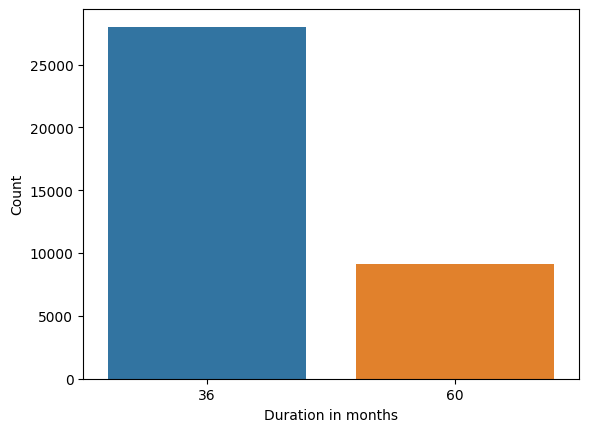

In [ ]:
#Duration Term of Loan
plot2=sns.countplot(x ='term', data = data)
plot2.set_xlabel('Duration in months')
plot2.set_ylabel('Count')

Inference: More than half of the loan taken has term of 36 months compared to 60 months.

Text(0, 0.5, 'Count')

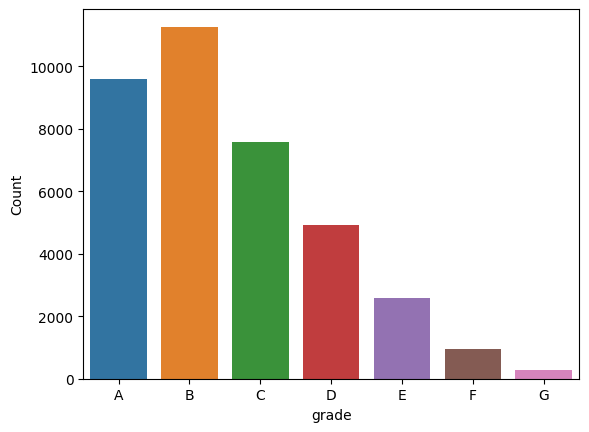

In [ ]:
#Distribution of grade
plot3=sns.countplot(x ='grade', data = data)
plot3.set_xlabel('grade')
plot3.set_ylabel('Count')

Inference: Most of loans are having A and B grade.

Text(0, 0.5, 'Density')

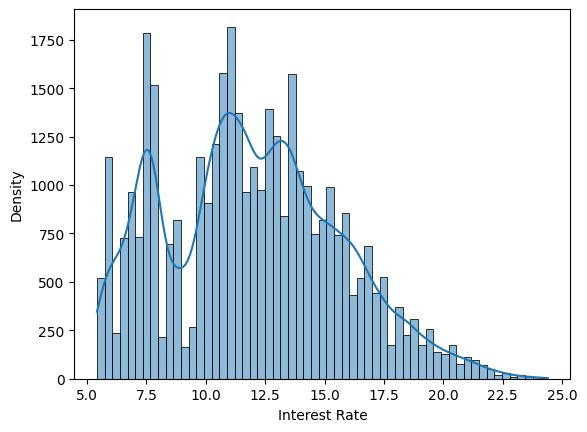

In [ ]:
# Plot histogram for Interest rate
plot4=sns.histplot(data = data, x = "int_rate", kde = True)
plot4.set_xlabel('Interest Rate')
plot4.set_ylabel('Density')

Inference: The interest rate is more around 6-7.5 and 10-13.

Text(0, 0.5, 'Count')

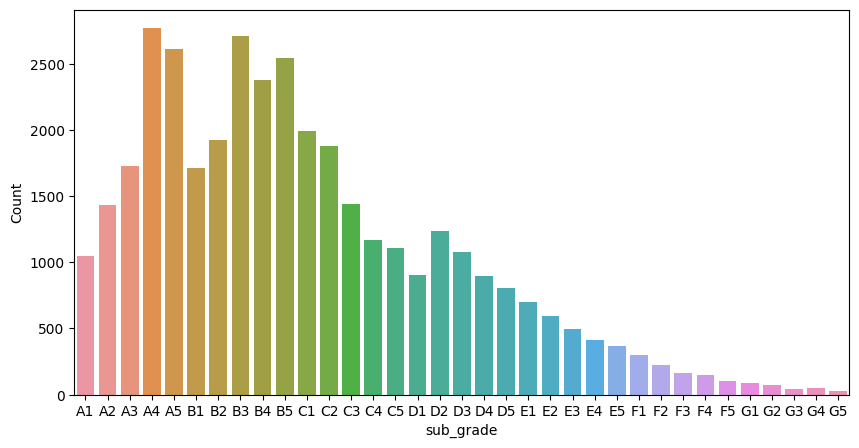

In [ ]:
#Distribution of sub grade
plt.figure(figsize=(10,5))
plot5=sns.countplot(x ='sub_grade', data = data)
plot5.set_xlabel('sub_grade')
plot5.set_ylabel('Count')

Inference:A large amount of loans are with lower subgrade in grade 'A' and 'B' commpared to rest showing most loans are high grade loans.

Text(0, 0.5, 'Count')

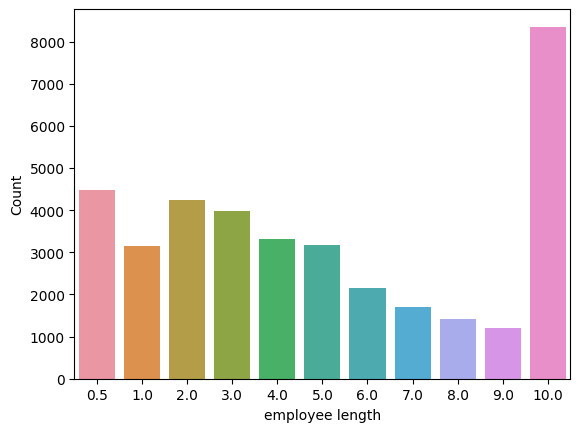

In [ ]:
#distribution of emp_length
plot6=sns.countplot(x ='emp_length', data = data)
plot6.set_xlabel('employee length')
plot6.set_ylabel('Count')

Inference: Most of the people who have loan are having experience of 10 years

Text(0, 0.5, 'Count')

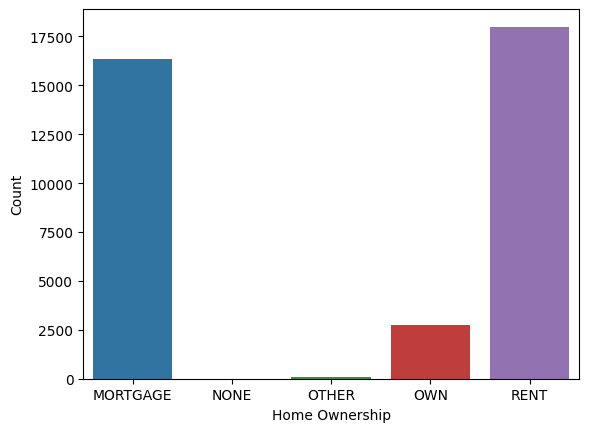

In [ ]:
#Distribution of home ownership
plot7=sns.countplot(x ='home_ownership', data = data)
plot7.set_xlabel('Home Ownership')
plot7.set_ylabel('Count')

Inference: Most of people who have taken loan are either living o  rent or on mortgage, they don't own their own property.

Text(0, 0.5, 'Count')

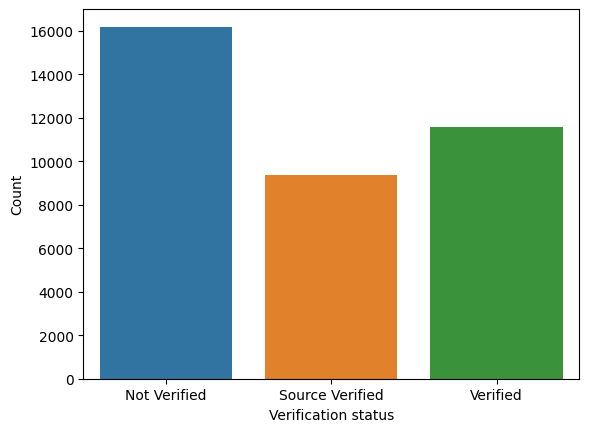

In [ ]:
#Distribution of verification status
plot8=sns.countplot(x ='verification_status', data = data)
plot8.set_xlabel('Verification status')
plot8.set_ylabel('Count')

Inference: Only around 50% people have verified their source by the company.

Text(0, 0.5, 'Density')

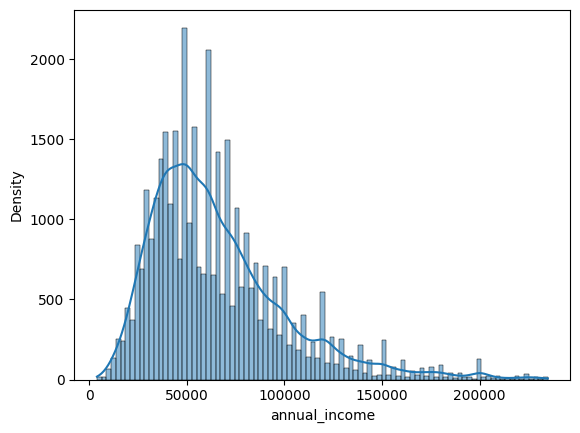

In [ ]:
# Plot histogram for Annual Income
plot9=sns.histplot(data = data, x = "annual_inc", kde = True)
plot9.set_xlabel('annual_income')
plot9.set_ylabel('Density')

Inference: Many people who took loan have less annual income

Text(0, 0.5, 'Count')

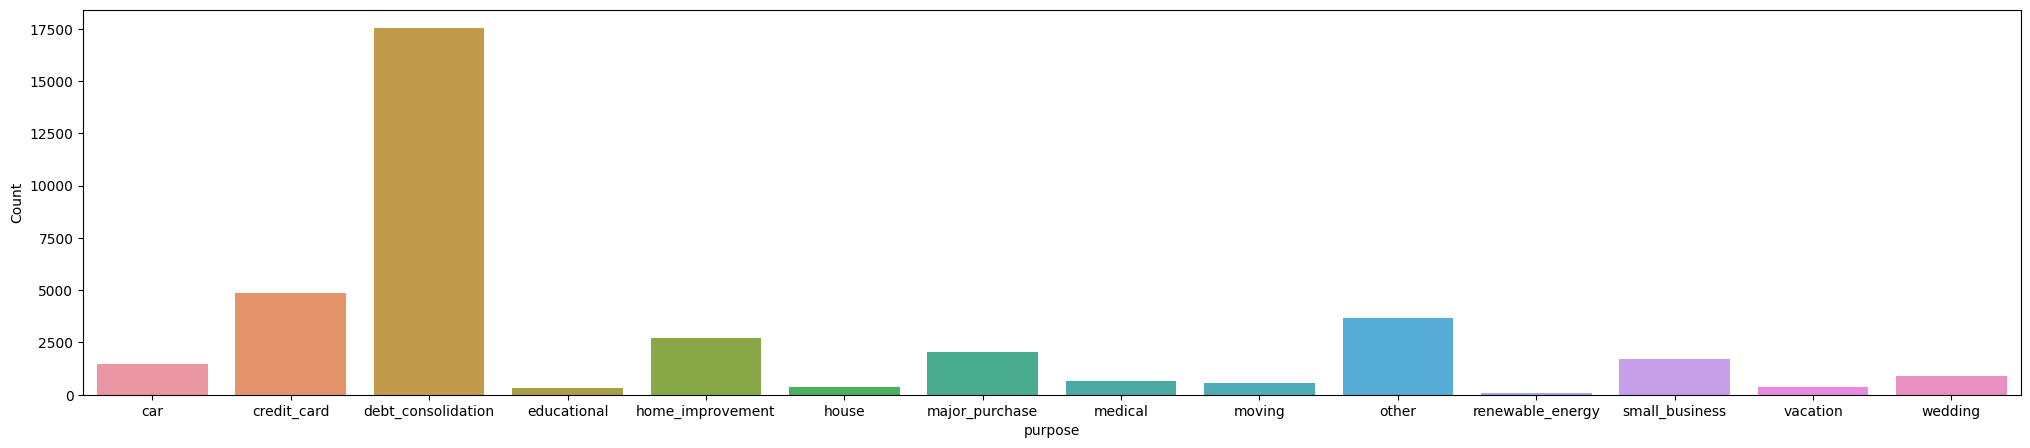

In [ ]:
#Distribution of purpose of taking loan
plt.figure(figsize=(25,5))
plot10=sns.countplot(x ='purpose', data = data)
plot10.set_xlabel('purpose')
plot10.set_ylabel('Count')

Inference:A large percentage of loans are taken for debt consolidation

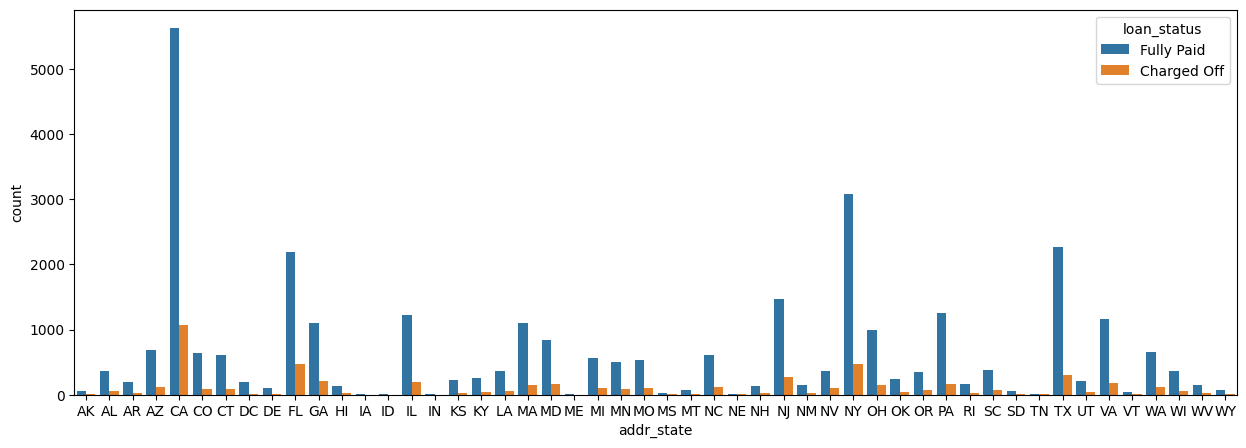

In [ ]:
# Distribution of addr_state
plt.figure(figsize=(15,5))
plot11=sns.countplot(x ='addr_state', hue = "loan_status", data = data)

Inference: Most of the people who have taken loan are from urban cities as compared to rural cities.

Text(0, 0.5, 'Density')

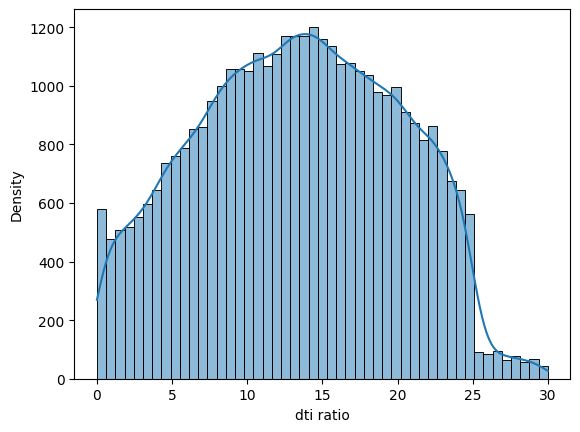

In [ ]:
# Plot histogram for DTI ratio
plot12=sns.histplot(data = data, x = "dti", kde = True)
plot12.set_xlabel('dti ratio')
plot12.set_ylabel('Density')

Inference: Majority of people who have taken loan have high debt

Text(0, 0.5, 'Count')

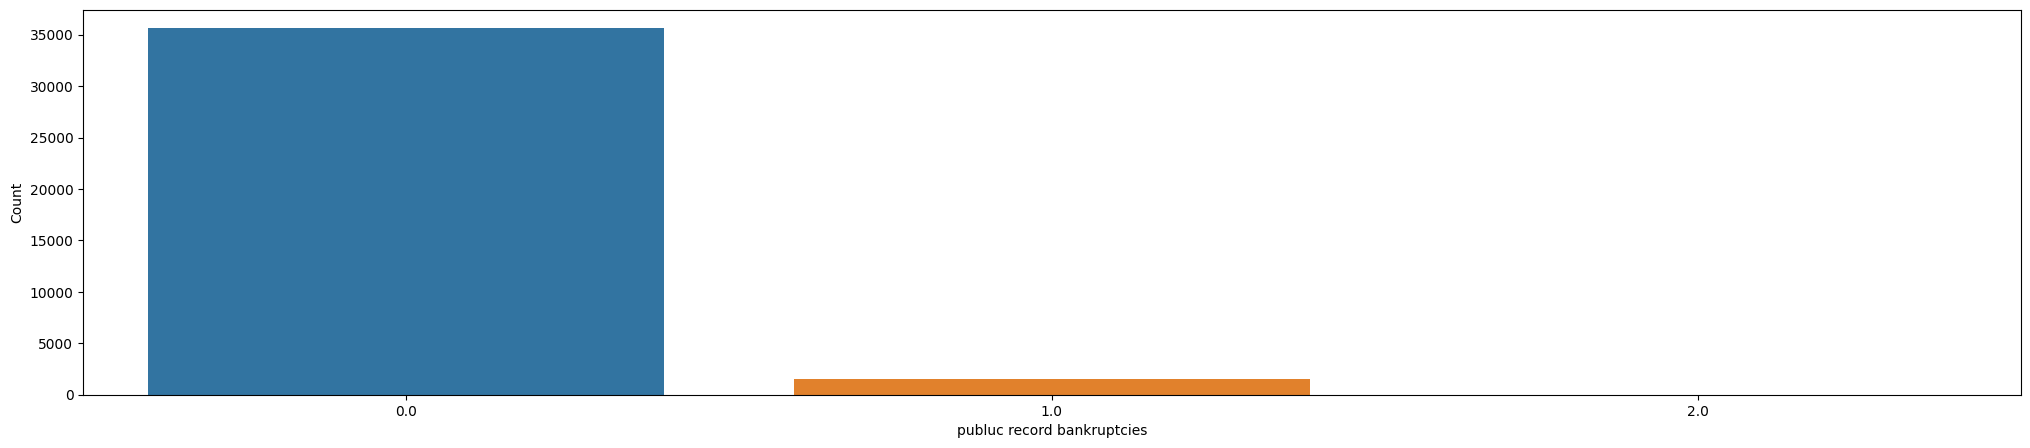

In [ ]:
#Distribution of public record bankruptcies
plt.figure(figsize=(25,5))
plot13=sns.countplot(x ='pub_rec_bankruptcies', data = data)
plot13.set_xlabel('publuc record bankruptcies')
plot13.set_ylabel('Count')

Inference: Most of the people have 0 bankruptcies record.

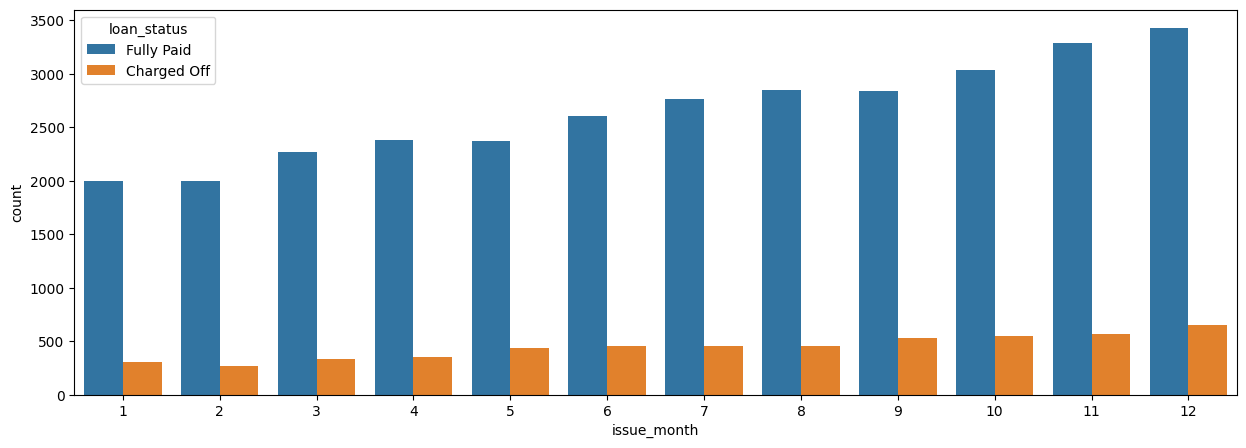

In [ ]:
# Distribution of loan issue month
plt.figure(figsize=(15,5))
plot14=sns.countplot(x ='issue_month', hue = "loan_status", data = data)

Inference: Most of the loans are issued in last quater of the year.

Text(0, 0.5, 'Count')

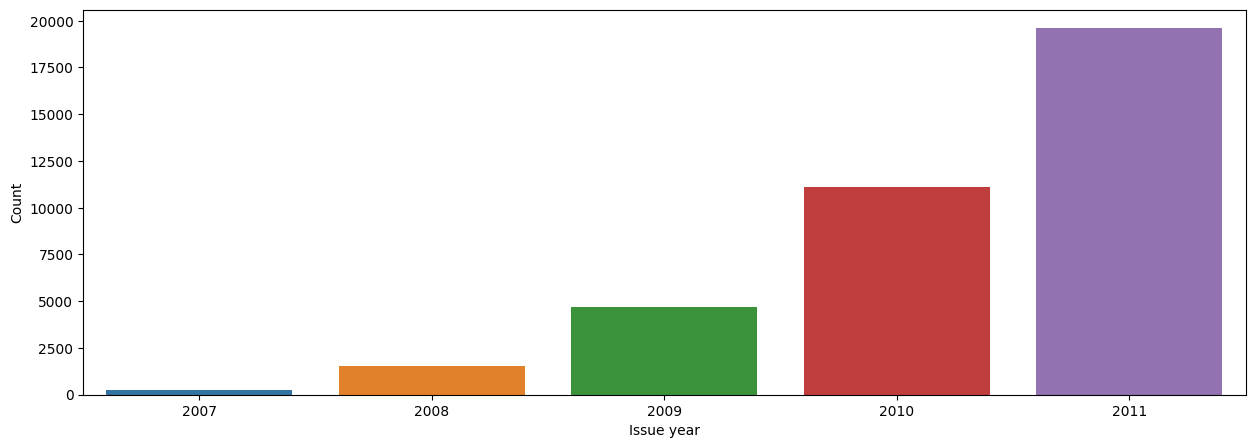

In [ ]:
#Distribution of issue year
plt.figure(figsize=(15,5))
plot13=sns.countplot(x ='issue_year', data = data)
plot13.set_xlabel('Issue year')
plot13.set_ylabel('Count')

Inference: the loan approval rate is increasing with the time.

Segmented Univariate Analysis

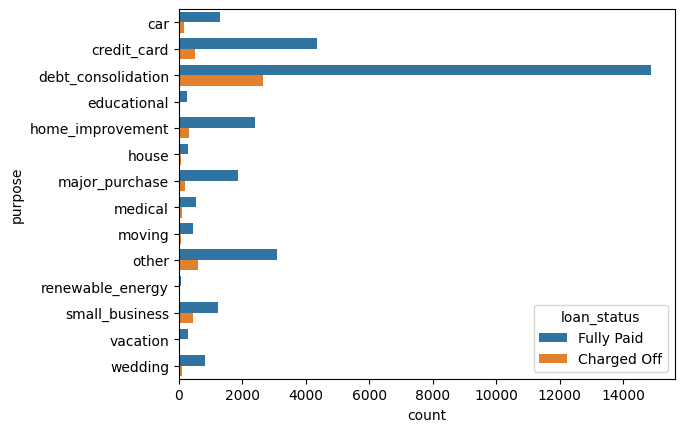

In [ ]:
# Distribution of purpose based on loan_status
plt1=sns.countplot(data=data,y='purpose',hue='loan_status')

Inference: Debt Consolidation is the most common reason for loan purpose and has highest number of fully paid loan and defaulted loan.

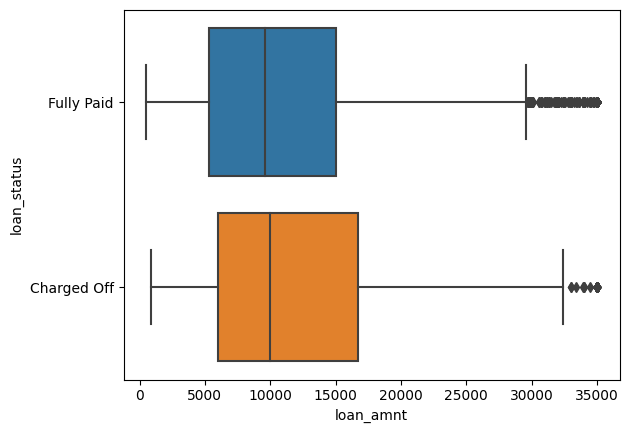

In [ ]:
# Distribution of loan_amnt based on loan_status
plt2=sns.boxplot(data=data,x='loan_amnt',y='loan_status')

Inference: The mean and 25% percentile are same for both but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.

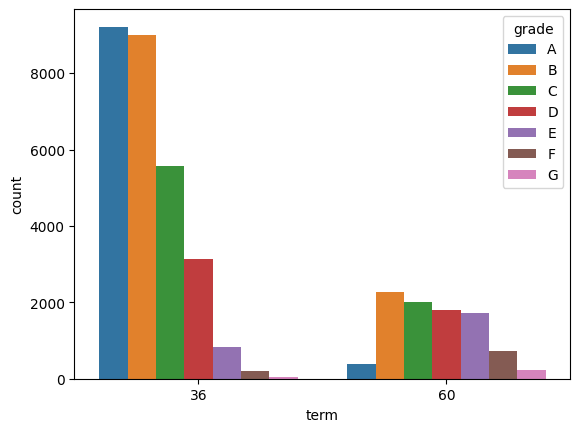

In [ ]:
# Distribution of Term based on Grade
plt3=sns.countplot(data=data,x='term',hue='grade')

Inference: The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.

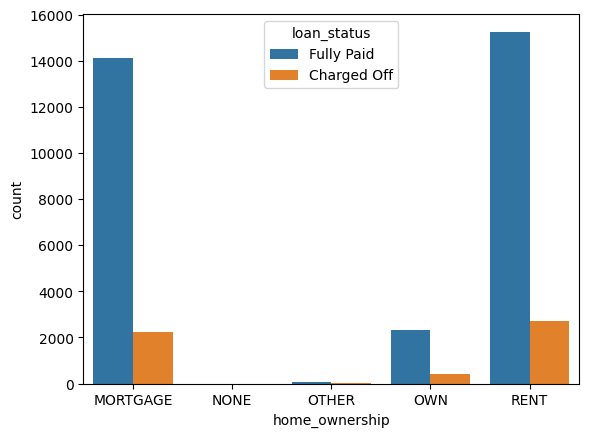

In [ ]:
# Distribution of house_ownership based on loan_status
plt4=sns.countplot(data=data,x='home_ownership',hue='loan_status')

Inference: The Defaulted loan are lower for the borrowers which own their property compared to on mortgage or rent.

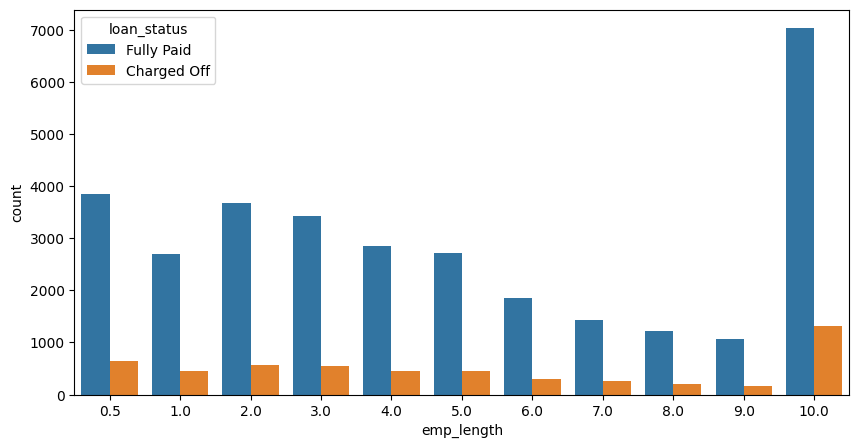

In [ ]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
plt5=sns.countplot(data=data,x='emp_length',hue='loan_status')

Inference:The Employees with 10 and more years of experience are likely to default and have higher chance of fully paying the loan.

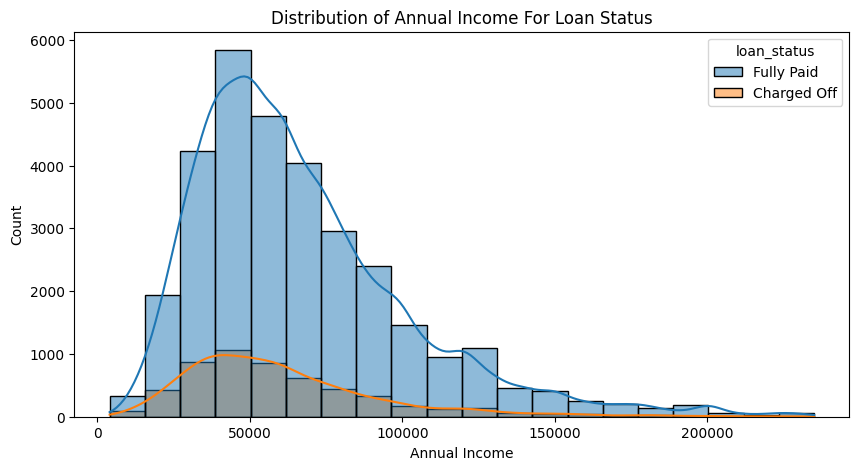

In [ ]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=data,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

Inference: The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate

Bivariate Analysis

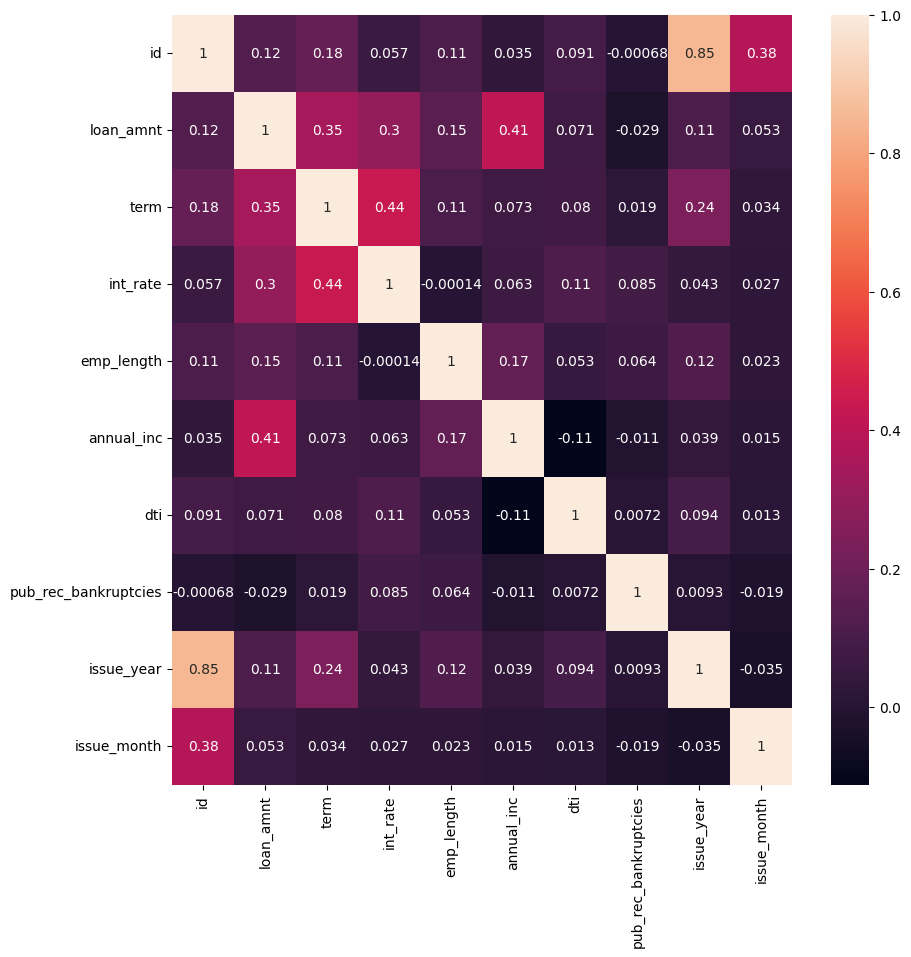

In [ ]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

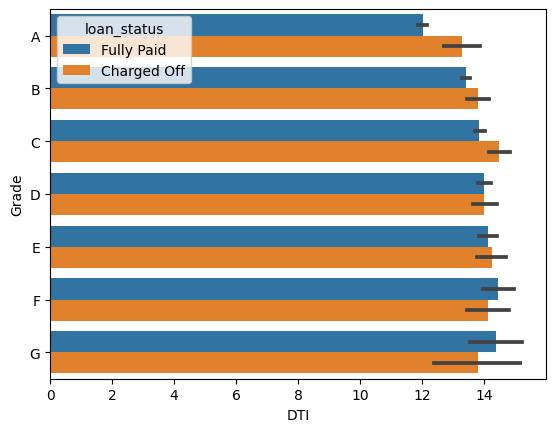

In [ ]:
# Comparison of DTI over grade for loan status
sns.barplot(data=data,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.show()

Inference:  The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.

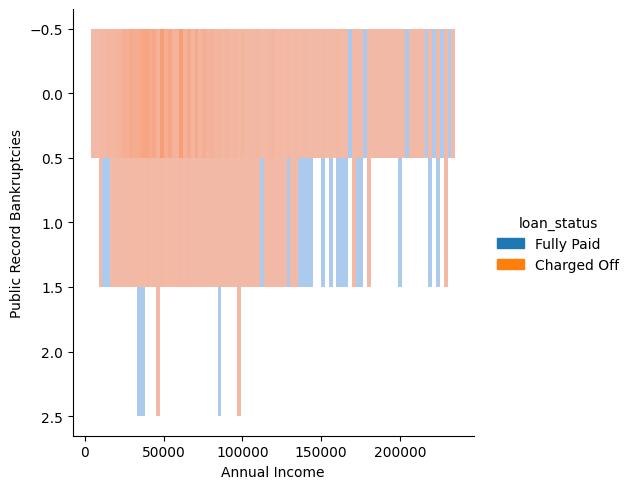

In [ ]:
# Comparison of annual income to public record bankruptcy over loan status
sns.displot(y=data.pub_rec_bankruptcies.astype('category'),x=data.annual_inc,hue=data.loan_status)
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.show()

Inference: The people who have taken loan are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

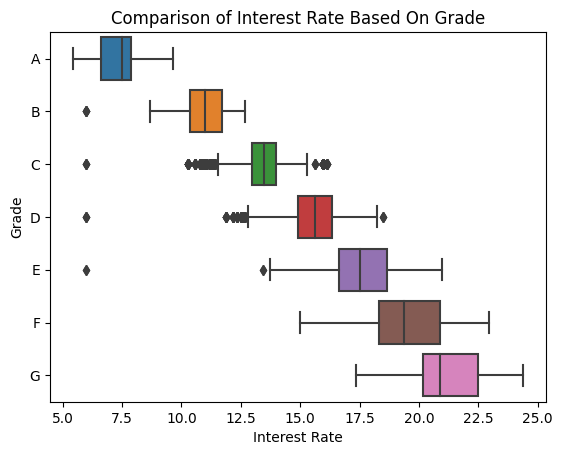

In [ ]:
# Comparison of interest rate based on grade
sns.boxplot(data=data,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

Inference: As the Grade represents risk factor thus we can say interst rate increases with the risk.

**Inferences:**


**Univariate Analysis:**

1)Loan defaulters are less as compared to people who have fully paid the loan i.e. The number of defaulted loans is 7 times less than the number of fully paid loans.

2) more than half of the loan taken has a term of 36 months compared to 60 months

3)Most loans have A and B grades.

4)The interest rate is more around 6-7.5 and 10-13.

5)A large number of loans have lower subgrades in grades 'A' and 'B' compared to the rest showing most loans are high-grade loans.

6)Most of the people who have loans are having experience of 10 years

7)Most people who have taken loans are either living on rent or a mortgage, they don't own their property.

8)Only around 50% of people have verified their source by the company

9)Many people who took loans have less annual income

10)A large percentage of loans are taken for debt consolidation.

11)Most of the people who have taken loans are from urban cities as compared to rural cities.

12)The majority of people who have taken loans have high debt.

13)Most of the people have 0 bankruptcies record.

14)Most of the loans are issued in the last quarter of the year.

15)the loan approval rate is increasing with time.



**Segmented Univariate Analysis:**

1) Debt Consolidation is the most common reason for loan purposes and has the highest number of fully paid loans and defaulted loans.

2)The mean and 25% percentile are the same for both but we see a larger 75% percentile in the defaulted loan which indicates a large amount of loan has a higher chance of defaulting.

3)The loans in 36-month terms majorly consist of grade A and B loans whereas the loans in 60-month terms mostly consist of grade B, C, and D loans.

4)The Defaulted loans are lower for the borrowers who own their property compared to those on mortgage or rent.

5) Employees with 10 or more years of experience are likely to default and have a higher chance of fully paying the loan.

6)The default loan amount increases with interest rate and shows are decline after a 17.5 % interest rate.

**Bivariate Analysis:**

1) Grade A which is the lowest risk also has the lowest DTI ratio which we can say that a higher grade has a lower rate of default.

2)The people who have taken loans mostly have no record of Public Recorded Bankruptcy and are the safe choice for loan issues.

3)As the Grade represents the risk factor we can say interest rate increases with the risk.


**Recommendations: Key Predictive Factors for Identifying and Preventing Loan Default and Credit Loss:**

1)DTI Ratio:

Leveraging the Debt-to-Income Ratio (DTI) in our risk assessment model is essential, as a high DTI signals potential financial strain, serving as a key predictor for defaults. Setting strategic thresholds and integrating DTI analysis during loan approval enables precise evaluation, minimizing credit loss by gauging applicants' financial stability.

2)Grades:

The grading system is central to assessing borrower creditworthiness; a thorough analysis of historical performance in different grades unveils patterns linked to defaults.

3)Verification Status:

Enhancing the verification process can significantly contribute to reducing defaults. By placing a premium on applications with verified information, we can instill greater confidence in the reliability of borrower data, thereby minimizing the risk of credit loss.

4)Annual income:

Annual income serves as a fundamental indicator of a borrower's financial capacity. Integrating a thorough analysis of annual income into our risk assessment model allows for a more comprehensive understanding of an applicant's ability to meet repayment obligations

5)Pub_rec_bankruptcies:

Examining an applicant's public records, especially bankruptcy history, is paramount in gauging their financial stability and risk of default. Implementing stringent scrutiny and potentially adjusting lending terms for individuals with a history of bankruptcies can be an effective strategy in mitigating credit loss.

**Additional considerations for finding loan defaults can include:**

* Borrowers residing outside major urban centers such as California, New York, Texas, Florida, etc.
* Borrowers falling within the annual income range of 50,000 to 100,000.
* Borrowers with a history of Public Recorded Bankruptcy.
* Borrowers assigned lower grades (E, F, G), indicating a higher risk profile.
* Borrowers exhibiting significantly elevated Debt-to-Income ratios.
* Borrowers possessing extensive work experience of 10 years or more.


